<a href="https://colab.research.google.com/github/dp2292/CP01-Data-Alchemists/blob/Jay/CP01_Data_Alchemists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Data Pre-processing and Analysis

In [2]:
!mkdir data

In [3]:
!gdown --id 1RfhNYBd7g70LdgJROvx8iPGygPhiGQLZ -O data/

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RfhNYBd7g70LdgJROvx8iPGygPhiGQLZ
To: /content/data/CP01.zip
100% 630M/630M [00:07<00:00, 84.8MB/s]


In [4]:
!unzip /content/data/CP01.zip -d /content/data

Archive:  /content/data/CP01.zip
  inflating: /content/data/For_modeling.csv  
  inflating: /content/data/cleaned_seoul_bike_data.csv  


In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# data = pd.read_csv('data/For_modeling.csv',index_col=0)
# data = data.reset_index().drop(columns=['index'])
data= pd.read_csv('/content/data/For_modeling.csv',
                  dtype={
                      'Duration': 'int32',
                      'Distance': 'int32',
                      'PLong': 'float32',
                      'PLatd': 'float32',
                      'DLong': 'float32',
                      'Haversine':'float32',
                      'Pmonth':'int8',
                      'Pday':'int8',
                      'Phour':'int8',
                      'Pmin':'int8',
                      'PDweek':'int8',
                      'Dmonth':'int8',
                      'Dday':'int8',
                      'Dhour':'int8',
                      'Dmin':'int8',
                      'DDweek':'int8',
                      'Temp':'float32',
                      'Precip':'float32',
                      'Wind':'float32',
                      'Solar':'float32',
                      'Snow':'float32',
                      'GroundTemp':'float32',
                      'Dust':'float32'
                  },index_col=0
                  )
data.head(5)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int64  
 1   Distance    int64  
 2   PLong       float64
 3   PLatd       float64
 4   DLong       float64
 5   DLatd       float64
 6   Haversine   float64
 7   Pmonth      int64  
 8   Pday        int64  
 9   Phour       int64  
 10  Pmin        int64  
 11  PDweek      int64  
 12  Dmonth      int64  
 13  Dday        int64  
 14  Dhour       int64  
 15  Dmin        int64  
 16  DDweek      int64  
 17  Temp        float64
 18  Precip      float64
 19  Wind        float64
 20  Humid       float64
 21  Solar       float64
 22  Snow        float64
 23  GroundTemp  float64
 24  Dust        float64
dtypes: float64(13), int64(12)
memory usage: 1.8 GB


# Seoul Trip Data Features

Here is a description of the parameters and features in the Seoul trip dataset:

| Abbreviation | Parameters/Features         | Type        | Measurement                  |
|--------------|-----------------------------|-------------|------------------------------|
| Duration     | Trip duration               | Continuous  | |
| Distance     | Trip distance               | Continuous  | |
| PLong        | Pickup longitude            | Continuous  | Radians                      |
| PLatd        | Pickup latitude             | Continuous  | Radians                      |
| DLong        | Dropoff longitude           | Continuous  | Radians                      |
| DLatd        | Dropoff latitude            | Continuous  | Radians                      |
| Haversine    | Haversine distance          | Continuous  | Kilometres                   |
| Pmonth       | Pickup month                | Categorical | January, February, March, … December |
| Pday         | Pickup day                  | Categorical | 1, 2, 3, … 31               |
| Phour        | Pickup hour                 | Categorical | 0, 1, 2, … 23               |
| Pmin         | Pickup minute               | Continuous  | 1, 2, 3, … 60               |
| PDweek       | Pickup day of the week      | Categorical | Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday |
| Dmonth       | Dropoff month               | Categorical | January, February, March, … December |
| Dday         | Dropoff day                 | Categorical | 1, 2, 3, … 31               |
| Dhour        | Dropoff hour                | Categorical | 0, 1, 2, … 23               |
| Dmin         | Dropoff minute              | Continuous  | 1, 2, 3, … 60               |
| DDweek       | Dropoff day of the week     | Categorical | Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday |
| Temp         | Temperature                 | Continuous  | °C                           |
| Precip       | Precipitation               | Continuous  | Mm                           |
| Wind         | Wind speed                  | Continuous  | m/s                          |
| Humd         | Humidity                    | Continuous  | %                            |
| Solar        | Solar radiation             | Continuous  | MJ/m2                        |
| Snow         | Snowfall                    | Continuous  | cm                           |
| GroundTemp   | Ground temperature          | Continuous  | °C                           |
| Dust         | 1-hour average fine dust concentration | Continuous | ㎍/㎥             |


In [ ]:
print(data.isna().sum().sort_values(ascending=False))

Duration      0
Dday          0
GroundTemp    0
Snow          0
Solar         0
Humid         0
Wind          0
Precip        0
Temp          0
DDweek        0
Dmin          0
Dhour         0
Dmonth        0
Distance      0
PDweek        0
Pmin          0
Phour         0
Pday          0
Pmonth        0
Haversine     0
DLatd         0
DLong         0
PLatd         0
PLong         0
Dust          0
dtype: int64


In [ ]:
data.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,...,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,1.437801e+01,...,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,...,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,...,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,...,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,...,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,...,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


In [ ]:
data_with_zero_displacement = data[data['Haversine']==0]
data_with_zero_displacement.head(5)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.0,1,1,0,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
26,18,1600,37.556610,126.898018,37.556610,126.898018,0.0,1,1,0,...,27,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
139,2,10,37.575970,126.983063,37.575970,126.983063,0.0,1,1,0,...,40,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
159,43,1940,37.548222,127.067879,37.548222,127.067879,0.0,1,1,0,...,26,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
206,13,490,37.609566,126.930977,37.609566,126.930977,0.0,1,1,0,...,5,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [ ]:
data_with_zero_displacement.shape

(955083, 25)

In [ ]:
data.shape

(9601139, 25)

Out of 9601139 recorded trips, 955083 are round-trips, meaning the rider has dropped the bike from where he picked up it! Logically, it doesn't make sense to include this data in predicting future bike trips duration from one point to another as the pickup and dropoff point being same, we cannot get any idea about the rider's whereabouts in between the trip from this data.

In [4]:
# Check if pickup and dropoff coordinates are the same
same_coordinates_mask = np.logical_and(data['PLong'] == data['DLong'], data['PLatd'] == data['DLatd'])

# Filter the data based on both conditions
filtered_data = data[~(same_coordinates_mask & (data['Haversine'] == 0))]

In [ ]:
filtered_data.shape

(8646056, 25)

In [4]:
# removing the tuples for which haversine == 0
filtered_data = data[data['Haversine'] != 0]

In [5]:
filtered_data.shape

(8646056, 25)

## Verifying all of the features' values

In [ ]:
pd.set_option('display.max_columns', None)
filtered_data.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06,8.646056e+06
mean,2.314345e+01,3.489543e+03,3.754772e+01,1.269909e+02,3.754782e+01,1.269908e+02,2.076918e+00,7.602102e+00,1.578030e+01,1.423248e+01,2.912769e+01,2.916600e+00,7.602499e+00,1.577990e+01,1.427496e+01,3.003549e+01,2.918615e+00,1.837109e+01,1.814095e-02,1.806268e+00,5.428914e+01,7.116840e-01,1.020934e-02,2.044014e+01,3.247510e+01
std,2.286414e+01,3.703603e+03,4.430949e-02,8.236528e-02,4.435297e-02,8.310713e-02,1.998044e+00,2.710842e+00,8.746445e+00,6.334764e+00,1.725796e+01,1.963908e+00,2.710829e+00,8.746214e+00,6.535078e+00,1.730486e+01,1.965282e+00,9.588562e+00,3.800871e-01,9.711955e-01,1.743514e+01,9.070460e-01,1.648211e-01,1.270838e+01,2.412606e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,2.088959e-02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,7.000000e+00,1.200000e+03,3.751424e+01,1.269201e+02,3.751424e+01,1.269196e+02,8.277592e-01,6.000000e+00,8.000000e+00,9.000000e+00,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01,1.000000e+00,1.200000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.120000e+01,1.600000e+01
50%,1.500000e+01,2.180000e+03,3.754769e+01,1.269943e+02,3.754707e+01,1.269943e+02,1.404650e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,1.990000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.500000e-01,0.000000e+00,2.090000e+01,2.700000e+01
75%,3.100000e+01,4.280000e+03,3.757324e+01,1.270618e+02,3.757328e+01,1.270624e+02,2.556391e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.500000e+01,5.000000e+00,2.540000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.230000e+00,0.000000e+00,2.840000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


### Checks:
1. `Duration`: check for values that aren't too big or negative.
There are no trips found with such values of duration.
2. `Distance`: check for no negative distances or extreme outliers. None found.
3. `PLong` and `DLong`: Check that longitude values are within the valid range of -180 to 180 degrees. None found.
4. `PLatd` and `DLatd`: Check that latitude values are within the valid range of -90 to 90 degrees. None found.
5. `Haversine`: computed from PLong, DLong, PLatd and DLatd.
6. `Pmonth, Pday, Phour, Pmin, PDweek, Dmonth, Dday, Dhour, Dmin, DDweek`: Check for months (1-12), days (1-31), hours (0-23), minutes (0-59), and days of the week (0-6). Everything is in check.
7. `Temp, Precip, Wind, Humid, Solar, Snow, GroundTemp, Dust`: Check for unrealistic values and outliers based on current known range for these weather parameters.

**Check for duplicate values**


In [ ]:
filtered_data.duplicated().value_counts()

False    8636811
True        9245
dtype: int64

This gives an indication that out of 8646056 tupples, 9245 tupples are duplicates.

In [6]:
#Remove all duplicates
filtered_data.drop_duplicates(inplace=True)
print("Dataset size after removing duplicates:", filtered_data.shape)

Dataset size after removing duplicates: (8636811, 25)


<ipython-input-6-ca0abfc58edb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop_duplicates(inplace=True)


In [7]:
columns_to_check = ['GroundTemp', 'Solar', 'Dust', 'Phour']

# Calculate the quartiles and IQR for the specified columns
Q1 = filtered_data[columns_to_check].quantile(0.25)
Q3 = filtered_data[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for outliers in each column
outliers_mask = ((filtered_data[columns_to_check] < lower_bound) | (filtered_data[columns_to_check] > upper_bound)).any(axis=1)

# Apply the mask to remove rows with outliers
filtered_data = filtered_data[~outliers_mask]


### Visualization

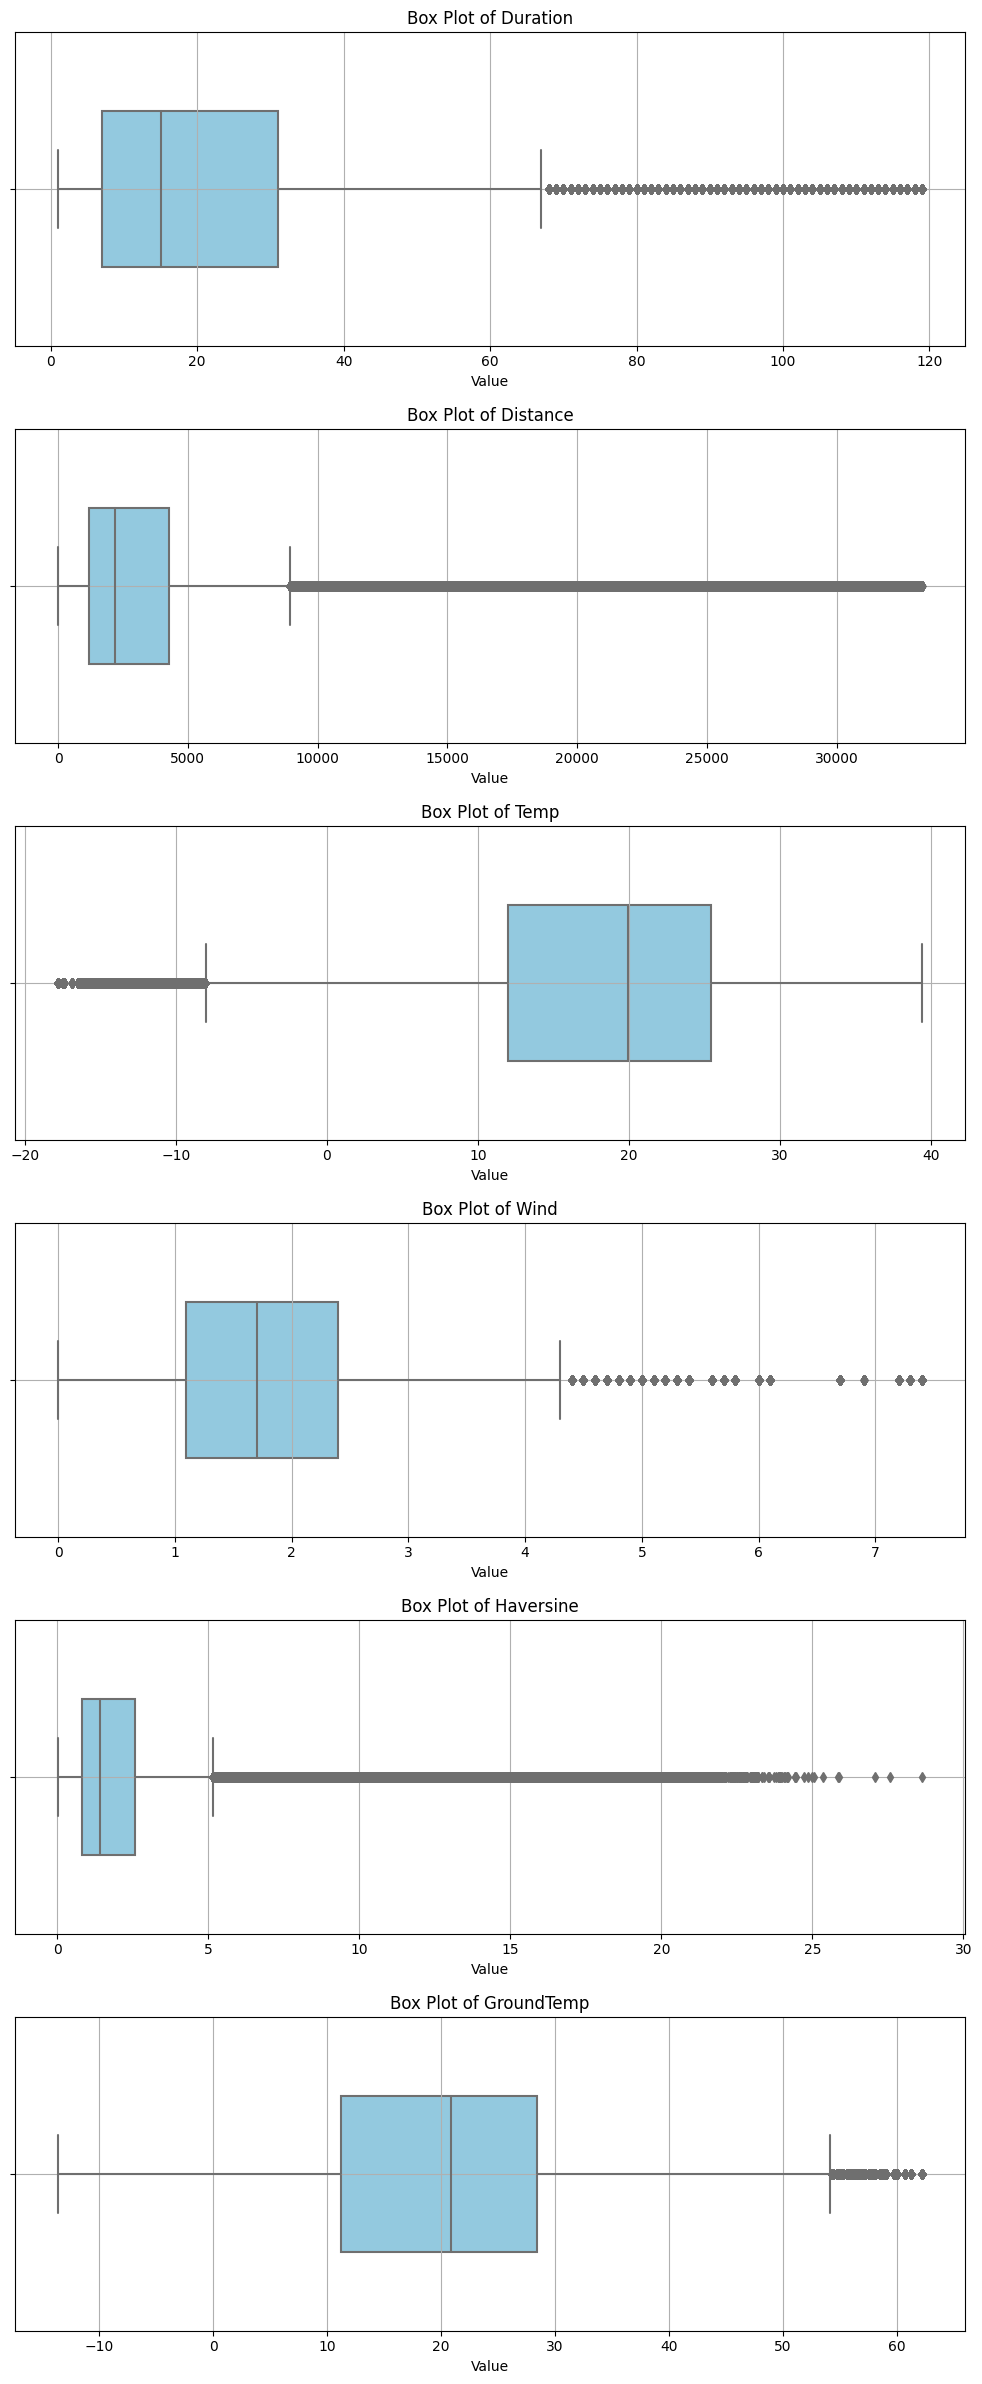

In [ ]:
columns_to_plot = [
    'Duration', 'Distance','Temp','Wind','Haversine', 'GroundTemp'
]

num_plots = len(columns_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 4*num_plots))


sns.set(style="whitegrid")

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.boxplot(x=filtered_data[column], ax=ax, color='skyblue', width=0.5)
    ax.set_title(f'Box Plot of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel('')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:


columns_for_histograms = [
    'Duration', 'Distance', 'Dhour', 'Phour', 'PLong',
    'PLatd', 'DLong', 'DLatd', 'Snow', 'GroundTemp', 'Dust', 'Pmonth'
]

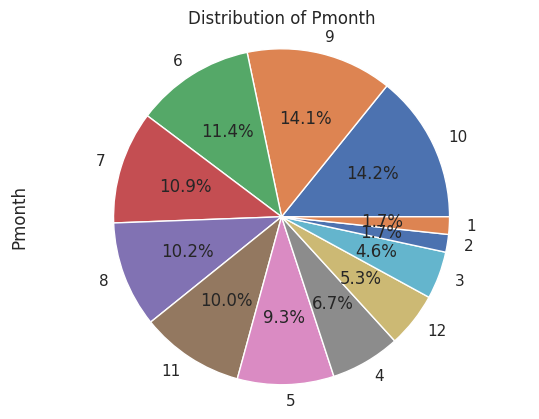

In [ ]:
filtered_data['Pmonth'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Pmonth')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

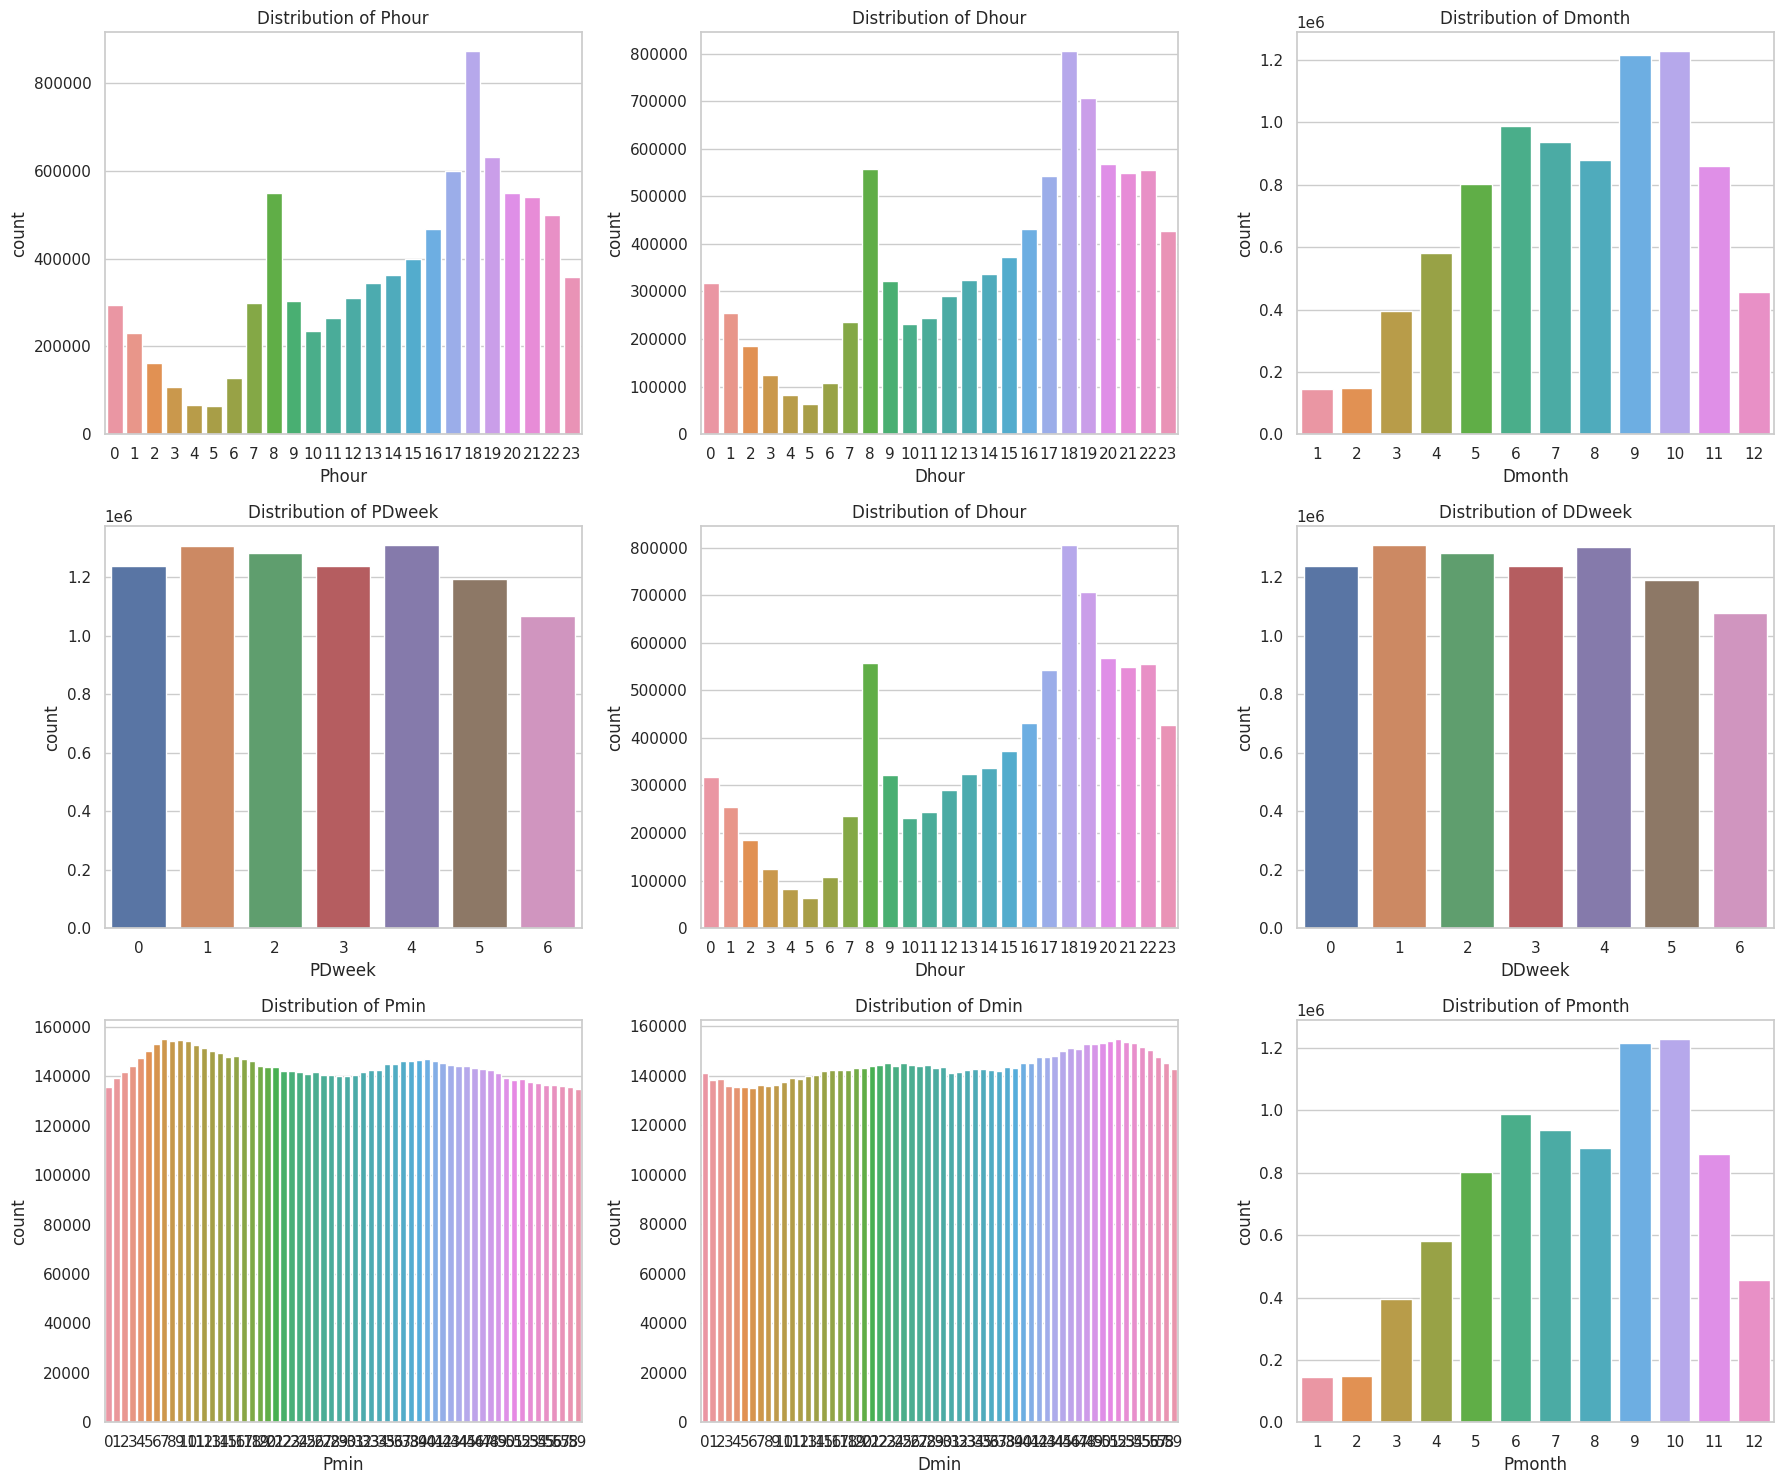

In [ ]:
col_names = ['Phour', 'Dhour','Dmonth', 'PDweek', 'Dhour', 'DDweek', 'Pmin', 'Dmin','Pmonth']

# Set up subplots with adjusted plot size
fig, axes = plt.subplots(3,3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(col_names):
    sns.countplot(x=filtered_data[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

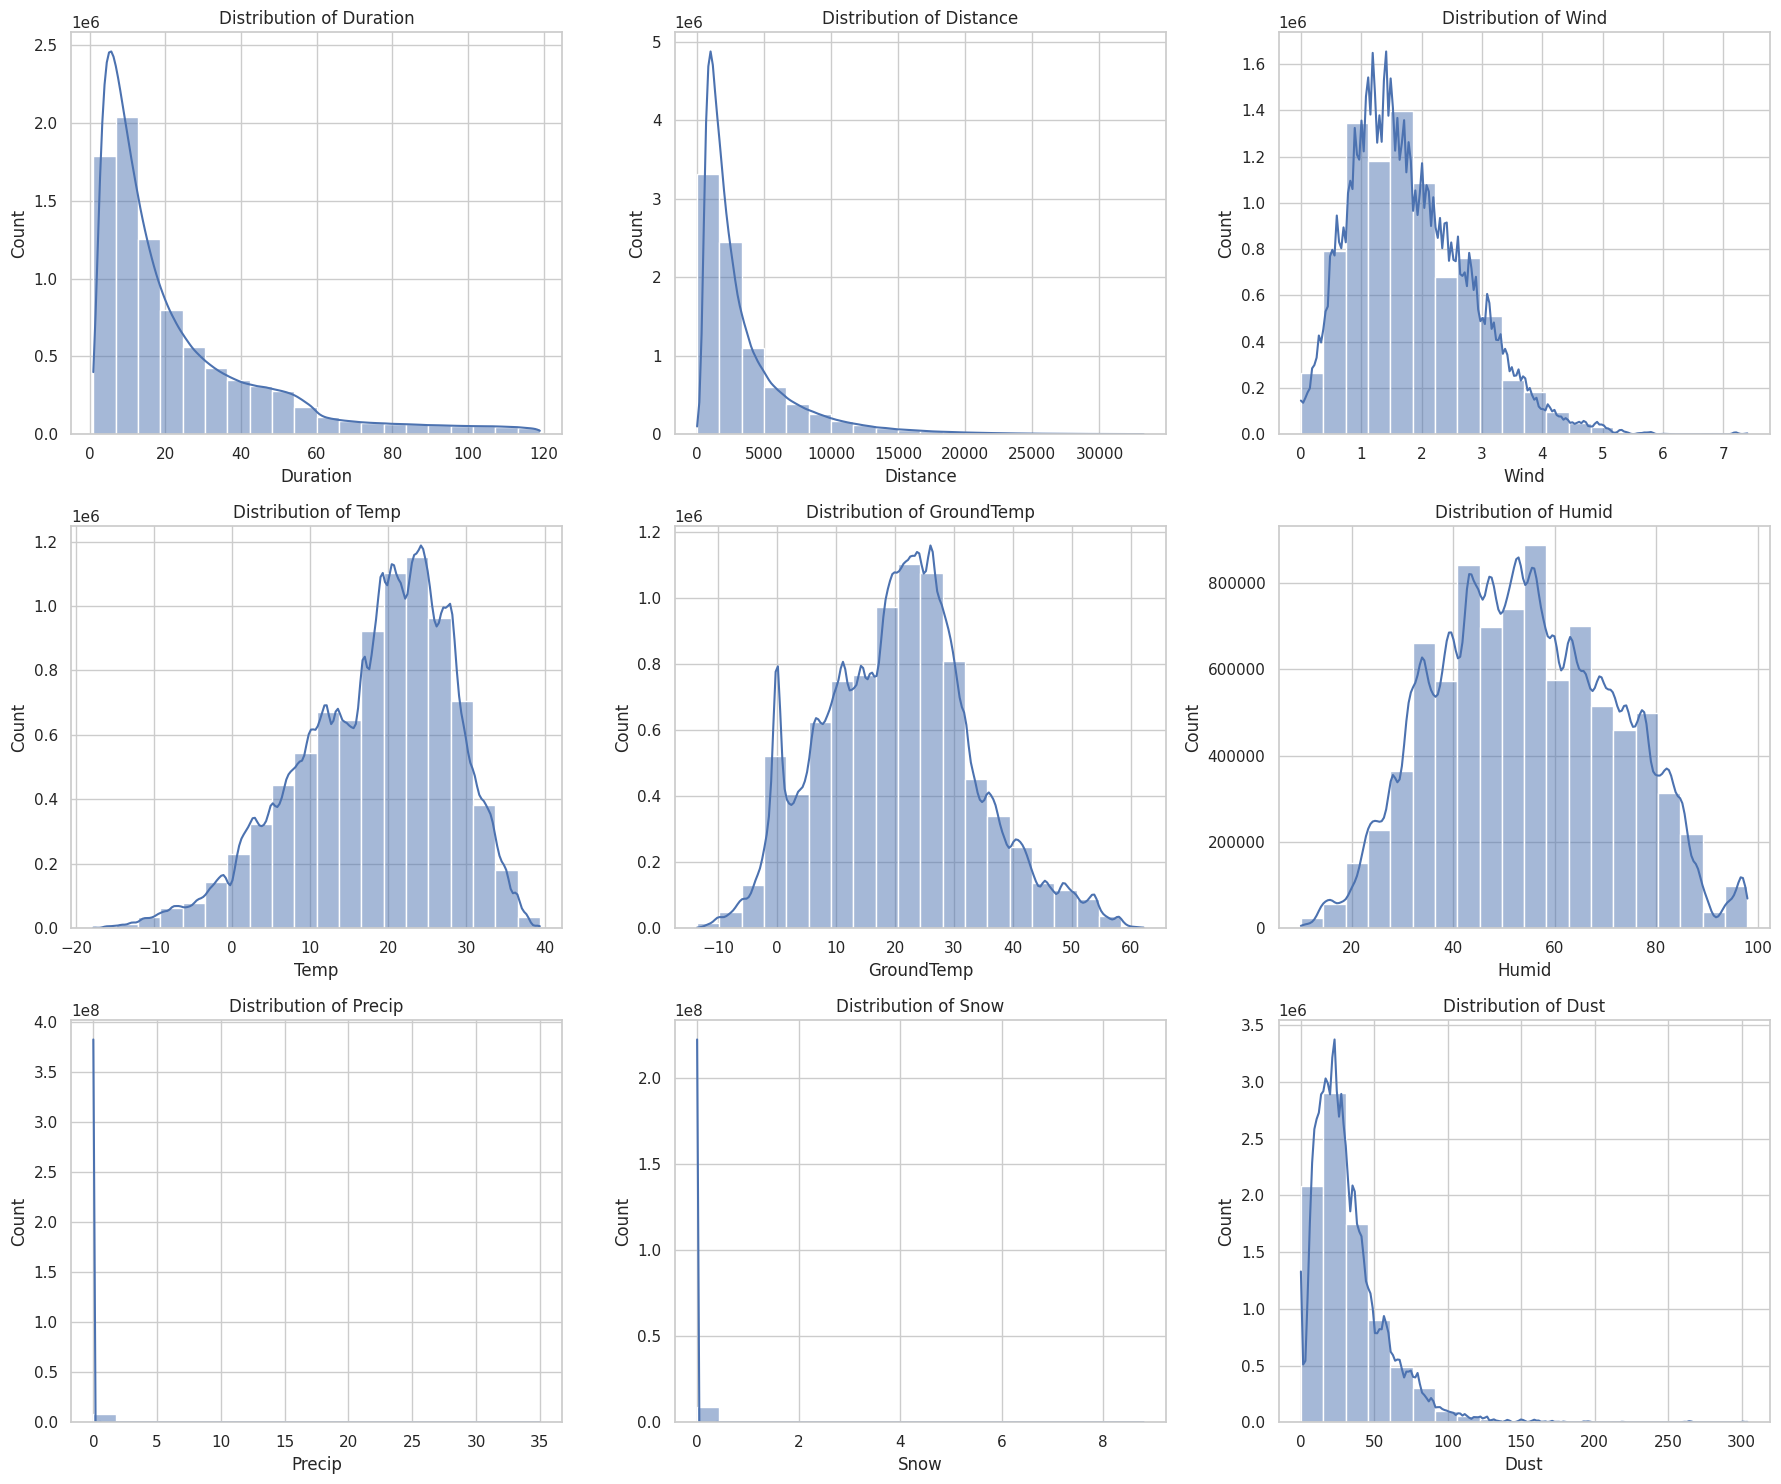

In [ ]:
col_names = ['Duration', 'Distance', 'Wind', 'Temp', 'GroundTemp', 'Humid', 'Precip', 'Snow', 'Dust']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(col_names):
    sns.histplot(filtered_data[col], ax=axes[i], kde=True, bins=20)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
col_names = ['Duration', 'Duration', 'Distance','Phour', 'Phour', 'Dhour', 'Dhour', 'Temp','Temp','Temp', 'Wind', 'Wind', 'Wind', 'Humid', 'Solar']
col_names1 = ['Distance', 'Haversine', 'Haversine','Wind', 'Humid', 'Wind', 'Humid', 'Solar', 'GroundTemp', 'Dust', 'Humid', 'Solar', 'Solar', 'GroundTemp']

fig, axes = plt.subplots(3, 5, figsize=(18, 15))
axes = axes.ravel()

for i in range(15):
    col = col_names[i]
    col2 = col_names1[i]
    axes[i].set_title(f'Scatter Plot: {col} vs {col2}')
    sns.scatterplot(x=filtered_data[col], y=filtered_data[col2], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(col2)

plt.tight_layout()
plt.show()

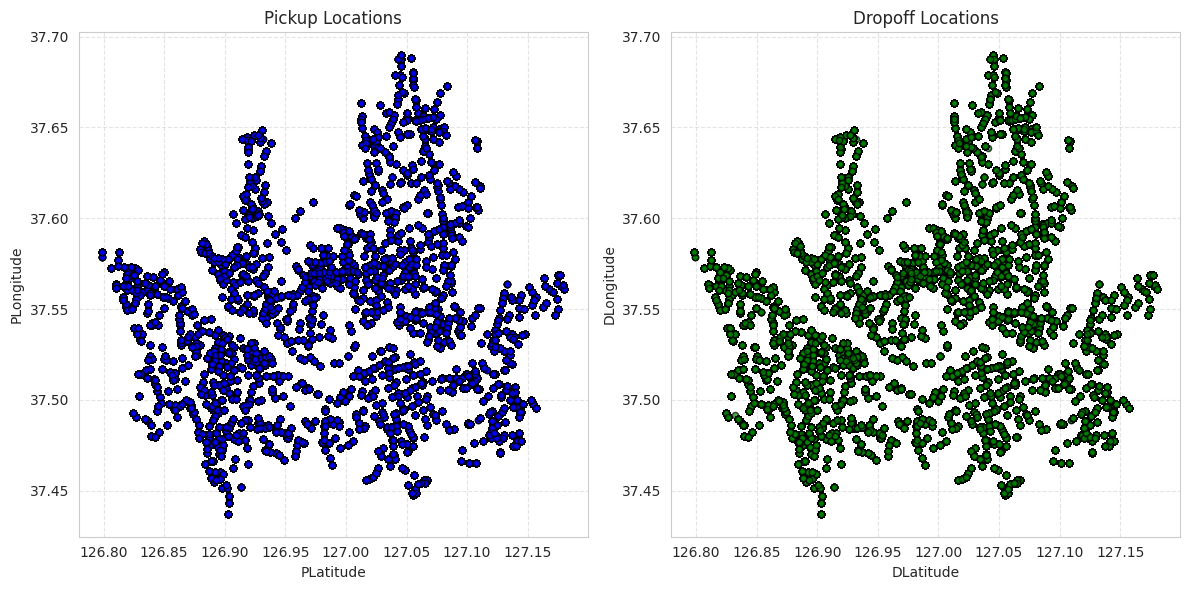

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for PLong and PLatd
axes[0].scatter(filtered_data['PLatd'], filtered_data['PLong'], s=20, alpha=0.7, c='blue', marker='o', edgecolors='k')
axes[0].set_xlabel('PLatitude')
axes[0].set_ylabel('PLongitude')
axes[0].set_title('Pickup Locations')
axes[0].grid(True, linestyle='--', alpha=0.5)

axes[1].scatter(filtered_data['DLatd'], filtered_data['DLong'], s=20, alpha=0.7, c='green', marker='o', edgecolors='k')
axes[1].set_xlabel('DLatitude')
axes[1].set_ylabel('DLongitude')
axes[1].set_title('Dropoff Locations')
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [13]:
correlation_matrix = filtered_data.corr()

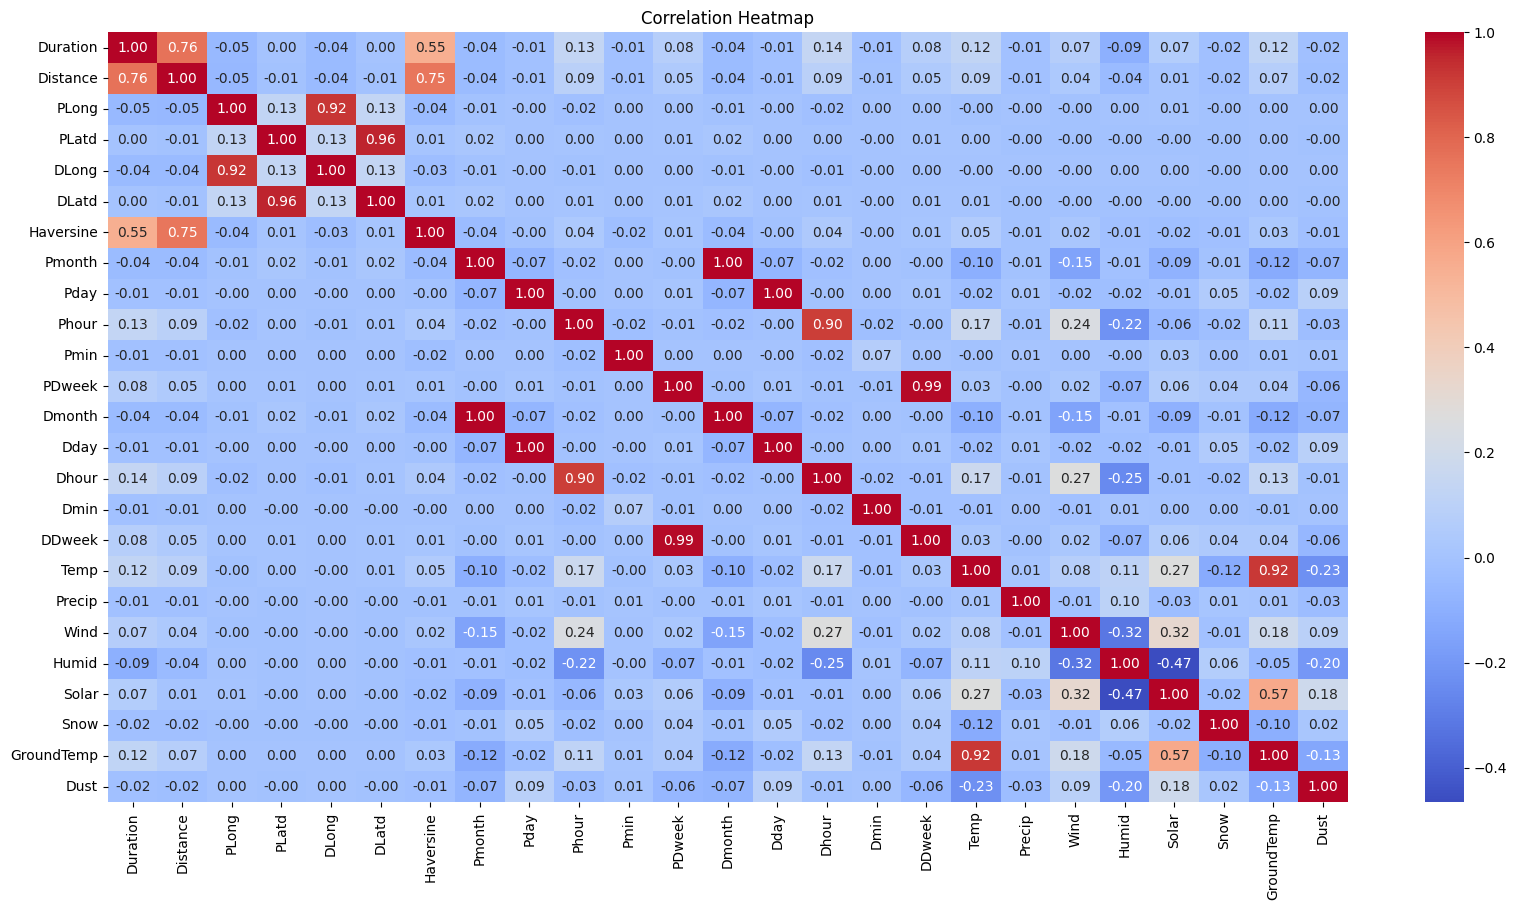

In [14]:
# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
absolute_correlations = correlation_matrix['Temp'].abs().drop('Temp')

# Sort the correlations in descending order
sorted_correlations = absolute_correlations.sort_values(ascending=False)

# Display the sorted correlations
print(sorted_correlations)

GroundTemp    0.906165
Solar         0.293016
Dust          0.225833
Dhour         0.168158
Phour         0.167909
Duration      0.122738
Snow          0.116741
Pmonth        0.112848
Dmonth        0.112765
Distance      0.091397
Wind          0.086492
Humid         0.079521
Haversine     0.049894
PDweek        0.034408
DDweek        0.034404
Pday          0.027993
Dday          0.027961
Precip        0.011456
Dmin          0.010148
DLatd         0.005003
PLatd         0.003936
PLong         0.003834
Pmin          0.000980
DLong         0.000455
Name: Temp, dtype: float64


In [ ]:
upper_triangular = np.triu(correlation_matrix, k=1)

# Define a threshold for correlation magnitude
threshold = 0.2 # You can adjust this threshold as needed

# Get the indices of correlations above the threshold
significant_indices = np.where(np.abs(upper_triangular) >= threshold)

# Get the column names
column_names = filtered_data.columns

# Print the significant correlations and their corresponding column names
for row, col in zip(*significant_indices):
    if row != col:
        column1_name = column_names[row]
        column2_name = column_names[col]
        correlation = correlation_matrix.iloc[row, col]
        sign = "Positive" if correlation >= 0 else "Negative"
        print(f"{sign} correlation between columns '{column1_name}' and '{column2_name}': {abs(correlation):.2f}")


Positive correlation between columns 'Duration' and 'Distance': 0.76
Positive correlation between columns 'Duration' and 'Haversine': 0.55
Positive correlation between columns 'Distance' and 'Haversine': 0.75
Positive correlation between columns 'PLong' and 'DLong': 0.92
Positive correlation between columns 'PLatd' and 'DLatd': 0.96
Positive correlation between columns 'Pmonth' and 'Dmonth': 1.00
Positive correlation between columns 'Pday' and 'Dday': 1.00
Positive correlation between columns 'Phour' and 'Dhour': 0.90
Positive correlation between columns 'Phour' and 'Wind': 0.24
Negative correlation between columns 'Phour' and 'Humid': 0.21
Positive correlation between columns 'PDweek' and 'DDweek': 0.99
Positive correlation between columns 'Dhour' and 'Wind': 0.26
Negative correlation between columns 'Dhour' and 'Humid': 0.24
Positive correlation between columns 'Temp' and 'Solar': 0.29
Positive correlation between columns 'Temp' and 'GroundTemp': 0.91
Negative correlation between col

### Model

In [8]:
df = filtered_data.drop([
    'Duration',
    'Distance',
    'PLong',
    'DLong',
    'DLatd',
    'Haversine',
    'Pmonth',
    'Pday',
    'Dday',
    'Dmin',
    'Pmin',
    'Dhour',
    'Dmonth',
    'DDweek',
    'PDweek',
    'Dhour',
    'Dmonth',
    'Precip',
    'Snow',
    'Wind',
    'Humid',
    'PLatd'
], axis=1)

df.describe()


,Phour,Temp,Solar,GroundTemp,Dust
count,8.120394e+06,8.120394e+06,8.120394e+06,8.120394e+06,8.120394e+06
mean,1.426953e+01,1.836910e+01,6.428433e-01,2.003136e+01,2.923081e+01
std,6.438792e+00,9.594031e+00,8.287639e-01,1.213512e+01,1.835340e+01
min,0.000000e+00,-1.780000e+01,0.000000e+00,-1.360000e+01,0.000000e+00
25%,9.000000e+00,1.210000e+01,0.000000e+00,1.130000e+01,1.500000e+01
50%,1.600000e+01,2.000000e+01,2.100000e-01,2.070000e+01,2.600000e+01
75%,1.900000e+01,2.540000e+01,1.120000e+00,2.780000e+01,4.000000e+01
max,2.300000e+01,3.900000e+01,3.070000e+00,5.410000e+01,8.100000e+01


In [9]:
# seoul_data = df.sample(n=30000, replace=True,random_state=20)
# seoul_data.reset_index(drop=True,inplace=True)
# seoul_data
df.shape

(8120394, 5)

In [10]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn import preprocessing

In [11]:
X_train,X_test, y_train, y_test = train_test_split(df.drop(columns=['Temp']), df['Temp'], test_size=0.4, random_state=43)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4872236, 4) (4872236,)
(3248158, 4) (3248158,)


In [12]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((4872236, 4), (3248158, 4))

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RidgeRegression': {"model": Ridge(), "params": {'alpha': [1.0]}},
    'LassoRegression': {"model": Lasso(), "params": {'alpha': [0.1]}},
    'ElasticNetRegression': {"model": ElasticNet(), "params": {'alpha': [0.1], 'l1_ratio': [0.99]}},
    # 'RandomForestRegressor': {"model": RandomForestRegressor(random_state=42),
                    #  "params": {'n_estimators': list(range(5, 50, 5)), 'max_depth': list(range(1, 10, 2))}}
    # 'XGBRegressor': {"model": XGBRegressor(), "params": {'n_estimators': list(range(10, 800, 100)), 'learning_rate': [0.001, 0.01, 0.1]}}

}

In [15]:
def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)
        print("Score Train: ",best_model.score(X_train_scaled,y_train))
        print("Score Test: ",best_model.score(X_test_scaled,y_test))

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 2.3091560715052992 {}
Score Train:  0.942042631856242
Score Test:  0.9422274836083074
RidgeRegression 2.3091560918575604 {'alpha': 1.0}
Score Train:  0.9420426308879142
Score Test:  0.9422274831558948
LassoRegression 2.320298184718877 {'alpha': 0.1}
Score Train:  0.9414819720570509
Score Test:  0.9416674563726871
ElasticNetRegression 2.321383771769065 {'alpha': 0.1, 'l1_ratio': 0.99}
Score Train:  0.9414272020822477
Score Test:  0.9416123203555045
Best model:  ElasticNet(alpha=0.1, l1_ratio=0.99)


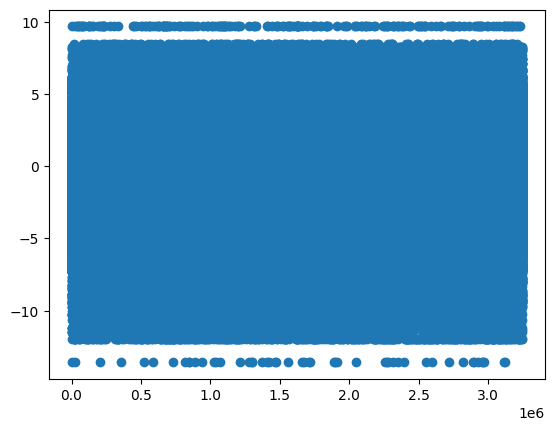

In [16]:
model_results = eval_models()

In [17]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,2.309156,2.306826,1.655776,1.653662,{}
RidgeRegression,2.309156,2.306826,1.655777,1.653662,{'alpha': 1.0}
LassoRegression,2.320298,2.31798,1.673376,1.671328,{'alpha': 0.1}
ElasticNetRegression,2.321384,2.319075,1.675159,1.673119,"{'alpha': 0.1, 'l1_ratio': 0.99}"


In [18]:
rfc = RandomForestRegressor()
rfc.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [19]:
y_pred_rfc = rfc.predict(X_test_scaled)

In [20]:
print("Random Forest : Train Score {:.2f} & Test Score {:.2f}".format(rfc.score(X_train_scaled, y_train), rfc.score(X_test_scaled, y_test)))

Random Forest : Train Score 1.00 & Test Score 1.00


In [22]:
xgb1 = XGBRegressor()
xgb1.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [23]:
y_pred_xgb1 = xgb1.predict(X_test_scaled)
predictions = [round(value) for value in y_pred_xgb1]

In [24]:
print("XGBoost : Train Score {:.2f} & Test Score {:.2f}".format(xgb1.score(X_train_scaled, y_train), xgb1.score(X_test_scaled, y_test)))


XGBoost : Train Score 0.99 & Test Score 0.99


In [25]:
LGB = LGBMRegressor()
LGB.fit(X_train_scaled, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.146286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 616
[LightGBM] [Info] Number of data points in the train set: 4872236, number of used features: 4
[LightGBM] [Info] Start training from score 18.369387


LGBMRegressor()

In [26]:
y_pred_LGB = LGB.predict(X_test_scaled)


In [27]:
print("LGBMRegressor : Train Score {:.2f} & Test Score {:.2f}".format(LGB.score(X_train_scaled, y_train), LGB.score(X_test_scaled, y_test)))


LGBMRegressor : Train Score 0.98 & Test Score 0.98
